In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/385916/experiment_lesson_4.csv')

In [4]:
df

order_id  delivery_time  district experiment_group
0          3159           44.0  Purlieus          control
1         10426           51.0  Purlieus          control
2          9155           46.0  Purlieus          control
3         10699           34.0  Purlieus          control
4         10061           43.0  Purlieus          control
...         ...            ...       ...              ...
20191     14561           42.0    Suburb             test
20192     12015           32.0    Suburb             test
20193     20077           23.0  Purlieus             test
20194     14861           41.0   Central             test
20195     13501           41.0   Central             test

[20196 rows x 4 columns]

district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

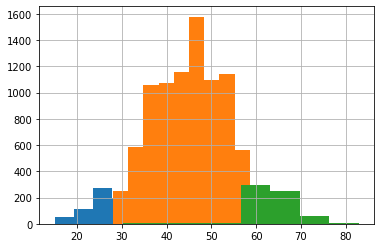

In [5]:
df.query('experiment_group == "control"').groupby('district').delivery_time.hist()

district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

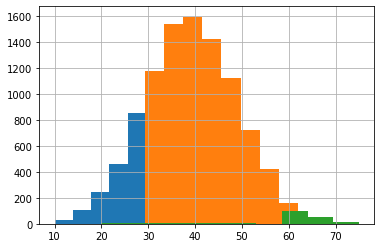

In [20]:
df.query('experiment_group == "test"').groupby('district').delivery_time.hist()

In [7]:
df.query('experiment_group == "control"').count()

order_id            10092
delivery_time       10092
district            10092
experiment_group    10092
dtype: int64

In [8]:
df.query('experiment_group == "test"').count()

order_id            10104
delivery_time       10104
district            10104
experiment_group    10104
dtype: int64

In [9]:
stats.shapiro(df[df['experiment_group'] == 'test']['delivery_time'].sample(1000, random_state=17))

(0.9975479245185852, 0.14013493061065674)

In [10]:
stats.shapiro(df[df['experiment_group'] == 'control']['delivery_time'].sample(1000, random_state=17))

(0.9974725842475891, 0.12411931157112122)

In [11]:
test = df[df['experiment_group'] == 'test']['delivery_time']

In [12]:
round(np.std(test),2)

9.88

In [13]:
control = df[df['experiment_group'] == 'control']['delivery_time']

In [14]:
round(np.std(control),2)

9.99

In [15]:
test_sr = df.query('experiment_group == "test"').delivery_time

In [16]:
control_sr = df.query('experiment_group == "control"').delivery_time

In [17]:
stats.ttest_ind(test_sr, control_sr)

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

In [18]:
round((test_sr.mean() - control_sr.mean()) / control_sr.mean()*100 ,2)

-13.35